In [17]:
import pandas as pd

boston_df = pd.read_csv("../HousingData.csv")

# 显示前5行数据
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


使用pandas库加载了波士顿房价数据集。

In [18]:
boston_df.info() #数据集信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


使用.info()方法查看了数据集的基本信息，包括条目数量、列数、数据类型等。

In [19]:
boston_df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [20]:
boston_df0=boston_df.fillna(0.0)
boston_df0.isnull().sum() #处理空值

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

发现数据集中有部分缺失值。
使用.fillna(0.0)方法填充了缺失值。

In [21]:
boston_df0

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,0.00,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,0.00,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


使用StandardScaler对数据进行了标准化处理

In [22]:
# 标准化处理
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
boston_scaled = scaler.fit_transform(boston_df0.drop('MEDV', axis=1))
boston_scaled_df = pd.DataFrame(boston_scaled, columns=boston_df0.drop('MEDV', axis=1).columns)

boston_scaled_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.404235,0.314369,-1.185361,-0.268391,-0.144217,0.413672,-0.020015,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-0.973338
1,-0.401785,-0.468160,-0.508491,-0.268391,-0.740262,0.194274,0.429306,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.413519
2,-0.401787,-0.468160,-0.508491,-0.268391,-0.740262,1.282714,-0.154484,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.101181
3,-0.401194,-0.468160,-1.203847,-0.268391,-0.835284,1.016303,-0.656281,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.247865
4,-0.396912,-0.468160,-1.203847,-0.268391,-0.835284,1.228577,-0.380784,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.643506


## 线性回归

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 划分训练集和测试集
X = boston_scaled_df
y = boston_df0['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建线性回归模型
lr = LinearRegression()
lr.fit(X_train, y_train)

# 预测
y_pred = lr.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(25.92969654962707, 0.6464153977582291)

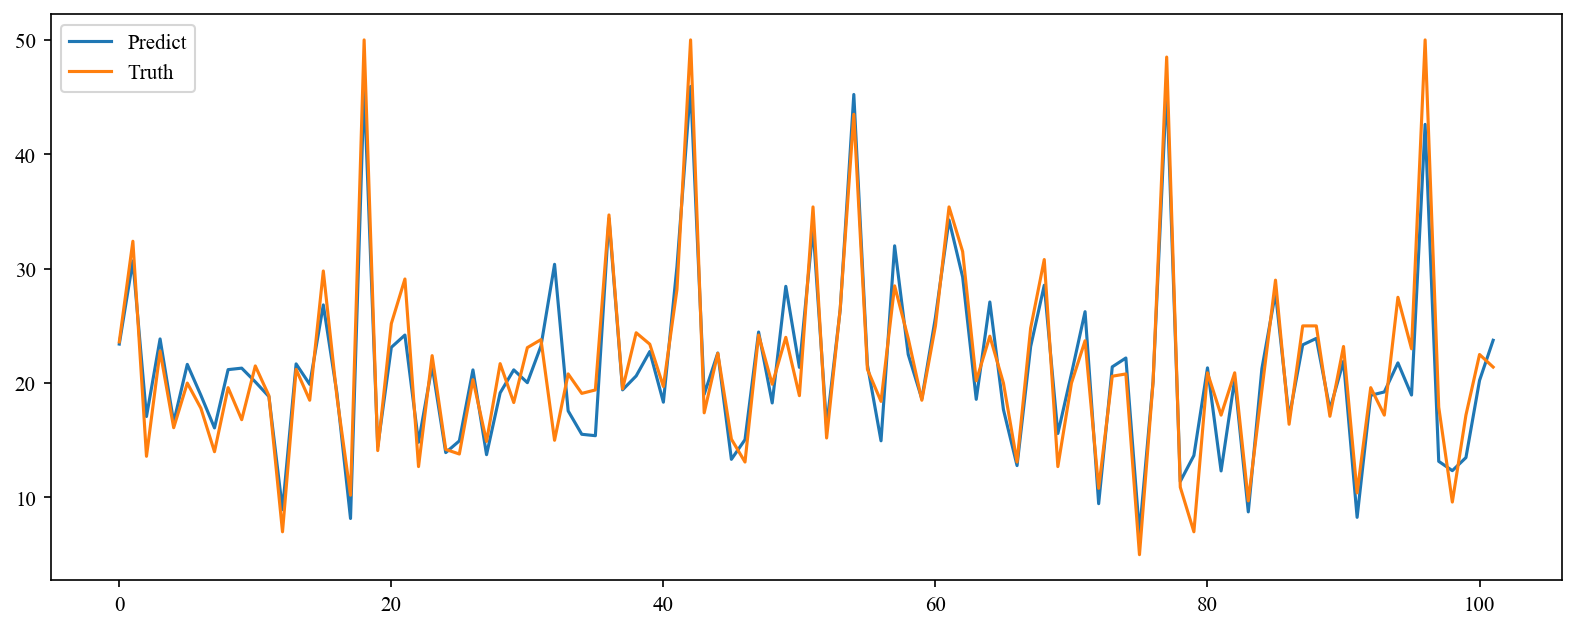

In [32]:
import matplotlib.pyplot as plt
hos_pre = pd.DataFrame()
hos_pre['Predict'] = y_pred
hos_pre['Truth'] = y_test.values
plt.figure(dpi=150,figsize=(13,5))
plt.plot(hos_pre,label=hos_pre.columns)
plt.legend()

In [25]:
# 均值填充空值
boston_df1=boston_df.fillna(boston_df.mean())
boston_df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


## 随机森林

In [26]:
boston_scaled = scaler.fit_transform(boston_df1.drop('MEDV', axis=1))
boston_scaled_df = pd.DataFrame(boston_scaled, columns=boston_df1.drop('MEDV', axis=1).columns)

from sklearn.ensemble import RandomForestRegressor

# 划分训练集和测试集
X = boston_scaled_df
y = boston_df1['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林回归模型``
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 预测
y_pred = rf.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(8.24374393137255, 0.8875859995747116)

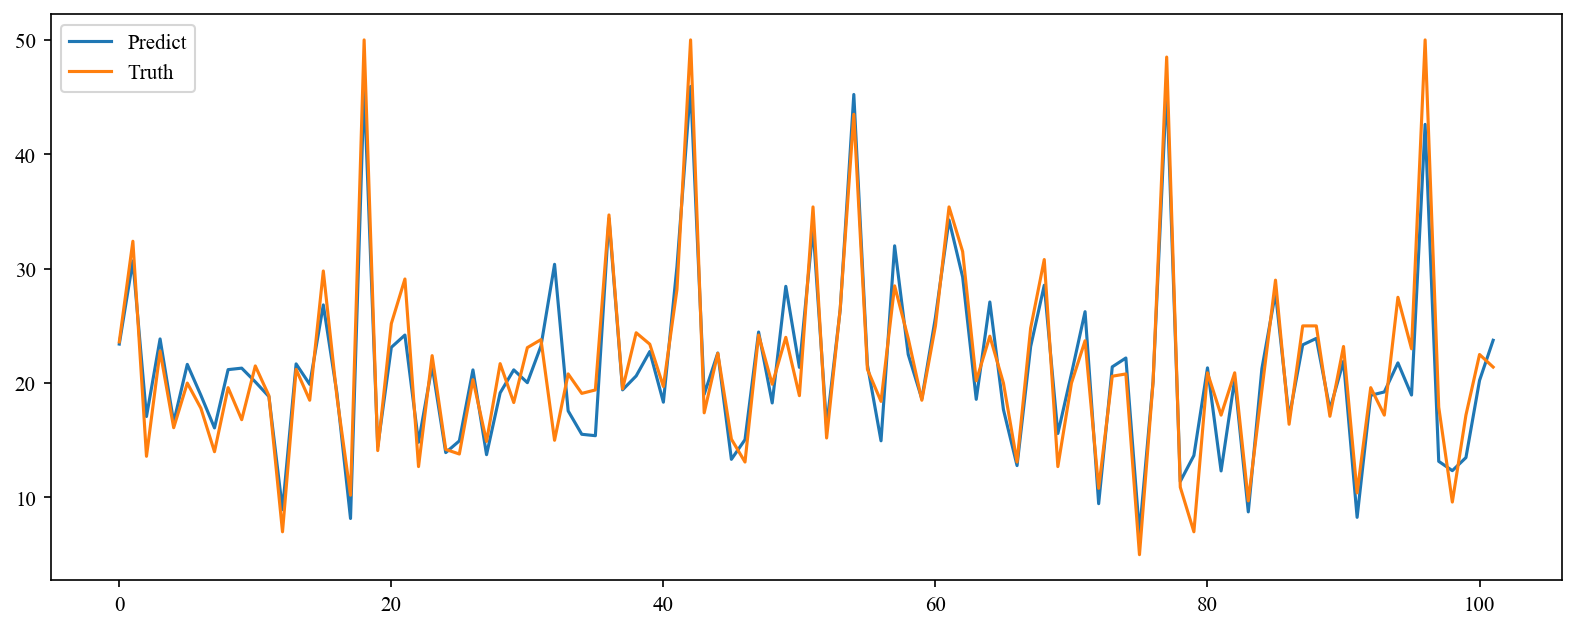

In [33]:
hos_pre = pd.DataFrame()
hos_pre['Predict'] = y_pred
hos_pre['Truth'] = y_test.values
plt.figure(dpi=150,figsize=(13,5))
plt.plot(hos_pre,label=hos_pre.columns)
plt.legend()

## SVM

In [30]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)

mse = mean_squared_error(y_test, svm_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(26.568324519310636, 0.8875859995747116)

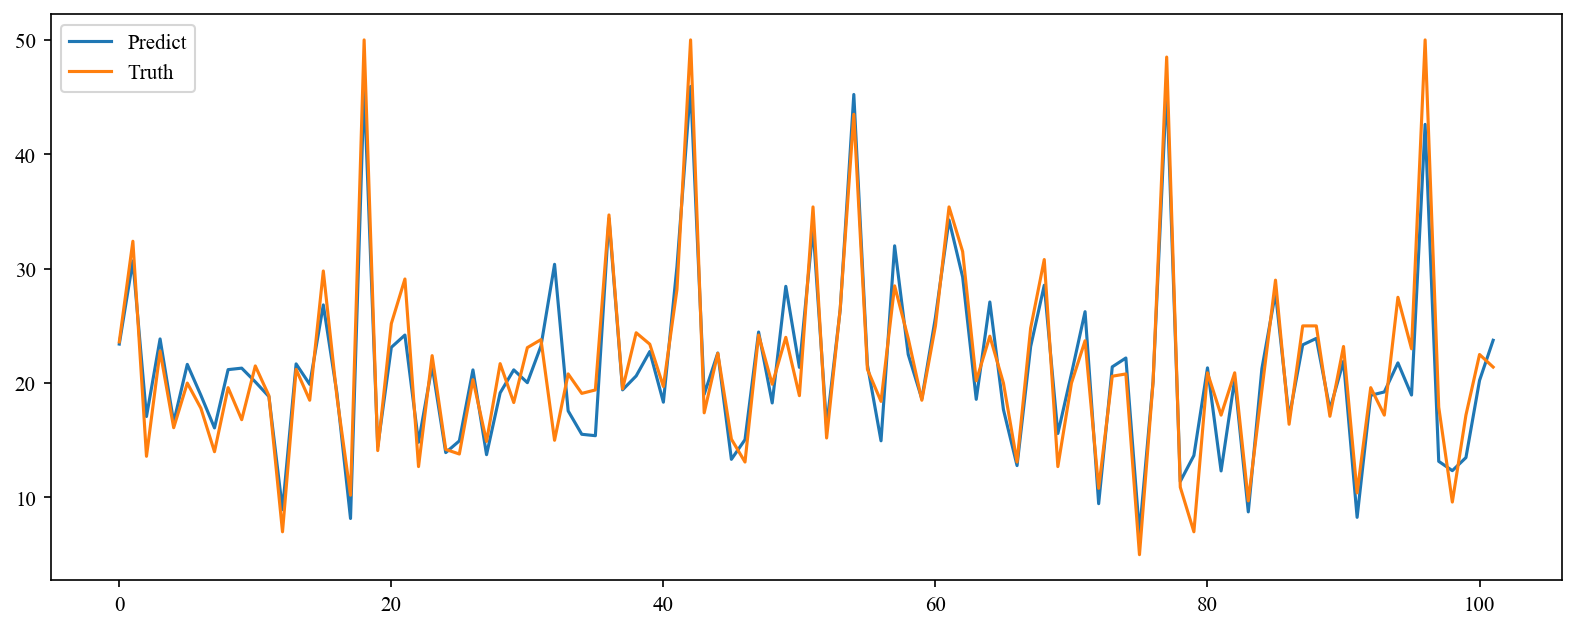

In [34]:
hos_pre = pd.DataFrame()
hos_pre['Predict'] = y_pred
hos_pre['Truth'] = y_test.values
plt.figure(dpi=150,figsize=(13,5))
plt.plot(hos_pre,label=hos_pre.columns)
plt.legend()

训练了多种回归模型并评估它们的性能：

线性回归 (LinearRegression)：计算了均方误差（MSE）和$R^2$分数。

随机森林回归 (RandomForestRegressor)：使用了100棵树，同样计算了MSE和$R^2$分数。

支持向量回归 (SVR)：使用支持向量机进行回归任务，计算了MSE和$R^2$分数。

## 实验结果 

线性回归的MSE为25.93，R²为0.646。

随机森林回归的MSE为8.24，R²为0.888。

支持向量回归的MSE为26.57，R²与随机森林回归相同，为0.888。